# Analyzing the database of car prices

Dataset is imported from 
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Description of the dataset is at
https://archive.ics.uci.edu/ml/datasets/Automobile

## Reading the data 

In [126]:
# Import libraries
import pandas as pd
import numpy as np


In [127]:
# Read the online file by the URL provides above, and assign it to variable "df"
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, header=None)

In [128]:
# The first 5 rows of the dataframe
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [129]:
# create headers list based on the dataset description at https://archive.ics.uci.edu/ml/datasets/Automobile
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
# replacing the headers
df.columns = headers

In [130]:
# data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [131]:
# summary statistics excluding NaN
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [132]:
# summary statistics of all columns
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [133]:
# look at the info of "df"
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
5            2                 ?         audi       gas        std   
6            1               158         audi       gas        std   
7            1                 ?         audi       gas        std   
8            1               158         audi       gas      turbo   
9            0                 ?         audi       gas      turbo   
10           2               192          bmw       gas        std   
11           0               192          bmw       gas        std   
12           0               188          bmw       gas   

## Dealing with missing data

In [134]:
# Convert "?" to NaN
df.replace("?", np.nan, inplace = True)

In [135]:
# Identifying the missing data
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Total: 205 rows

Missing values in:
<ol>
<li>'normalized-losses': 41 missing values</li>
<li>'num-of-doors': 2 missing values</li>
<li>'bore': 4 missing values</li>
<li>'stroke': 4 missing values</li>
<li>'horsepower': 2 missing values</li>
<li>'peak-rpm': 2 missing values</li>
<li>'price': 4 missing values</li>
</ol>

### Replacing missing data by the average value

In [137]:
# Calculate the average of the column and replace NaN by mean value
# For columns 'normalized-losses', 'bore', 'stroke','horsepower', 'peak-rpm'

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

### Replacing the missing data by the most frequent value

In [138]:
#To see the values in a column
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [139]:
# the most common type
df['num-of-doors'].value_counts().idxmax()

'four'

In [140]:
# Replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

### Dropping the missing data

In [141]:
# simply drop whole row with NaN in 'price' column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

## Correct the data format

In [142]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [143]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization

In [144]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]


In [145]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height']= df['height']/df['height'].max()

## Binning

In [146]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


Text(0.5, 1.0, 'horsepower bins')

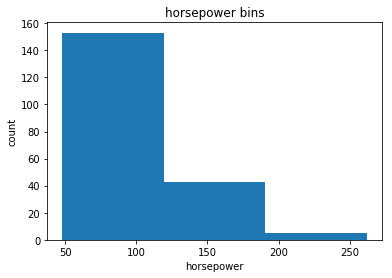

In [147]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

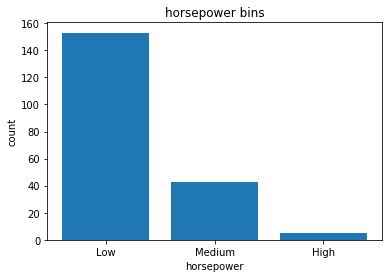

In [148]:
# 3 bins of equal size bandwidth
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
# Setting group names
group_names = ['Low', 'Medium', 'High']
# We apply the function "cut" the determine what each value of "df['horsepower']" belongs to
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Dealing with categorical variables

In [149]:
# get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
# We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type"
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [150]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])
# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


In [151]:
#df.to_csv('clean_df.csv')

<h2 id="pattern_visualization">Analyzing Individual Feature Patterns using Visualization</h2>

In [152]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [153]:
# correlation between variables of type "int64" or "float64" 
df.corr()
# df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


### Positive correlation between variables

In [154]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56068.222247132115)

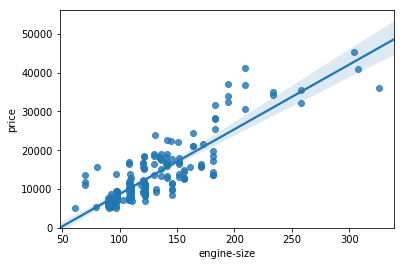

In [155]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Positive direct correlation!

### Inverse/negative correlation between variables

In [156]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


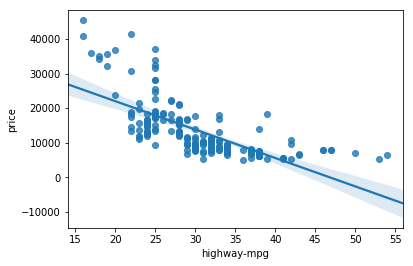

In [157]:
sns.regplot(x="highway-mpg", y="price", data=df)

<h3>Weak Linear Relationship</h3>

In [158]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


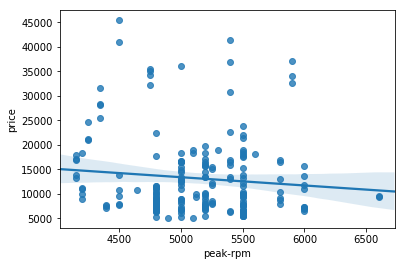

In [159]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [160]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


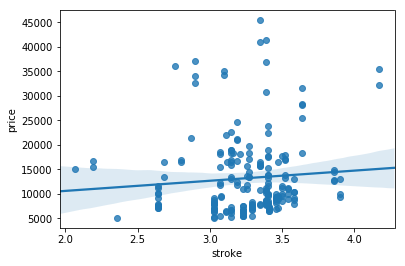

In [161]:
sns.regplot(x="stroke", y="price", data=df)

<h3>Categorical variables</h3>

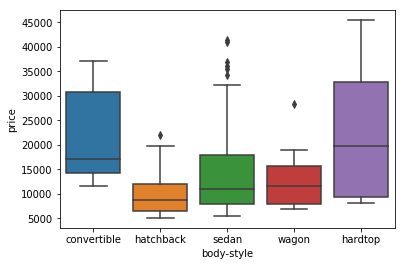

In [162]:
sns.boxplot(x="body-style", y="price", data=df)

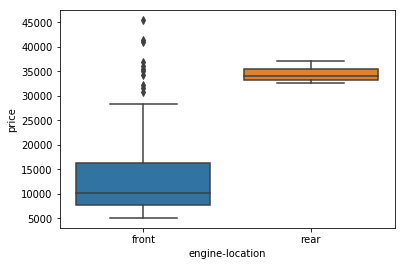

In [163]:
sns.boxplot(x="engine-location", y="price", data=df)

The distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

The distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

## Descriptive Statistical Analysis

In [164]:
df.describe()
# df.describe(include=['object'])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [165]:
# Creating a dataframe "drive_wheels_counts" 
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'


## Grouping

In [166]:
# group by the variable "drive-wheels" and see the different categories of drive wheels
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [167]:
# select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".
df_group_one = df[['drive-wheels','body-style','price']]

In [168]:
# calculate the average price for each of the different categories
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [169]:
# with multiple variables
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Pivot 

In [170]:
# We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.
# We will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Heat map

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

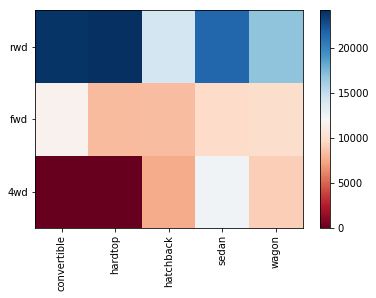

In [171]:
# heat map to visualize the relationship between Body Style vs Price.
# use the grouped results

# plt.pcolor(grouped_pivot, cmap='RdBu')
# plt.colorbar()
# plt.show()

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2 id="correlation_causation"> Correlation and Causation</h2>

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

### Pearson Correlation

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>


<b>P-value</b>: 
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [172]:
from scipy import stats

In [173]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("For wheel-base vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("For horsepower vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("For length vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("For width vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "For curb-weight vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("For engine-size vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("For bore vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("For city-mpg vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "For highway-mpg vs price: Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

For wheel-base vs price: Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20
For horsepower vs price: Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270651004e-48
For length vs price: Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158713e-30
For width vs price: Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38
For curb-weight vs price: Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53
For engine-size vs price: Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64
For bore vs price: Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17
For city-mpg vs price: Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.3211320655676368e-29
For highway-mpg

The correlation between wheel-base and price is statistically significant (p-value < 0.001), although the linear relationship isn't extremely strong (~0.585).

The correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

The correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

The correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

The correlation between curb-weight and price is statistically significant, and the linear relationship is strong (~0.834).

The correlation between engine-size and price is statistically significant, and the linear relationship is strong (~0.872).

The correlation between bore and price is statistically significant, but the linear relationship is moderate (~0.543).

The correlation between city-mpg and price is statistically significant, and the linear relationship is negative and moderately strong (~-0.687).

The correlation between highway-mpg and price is statistically significant, and the linear relationship is negative and moderately strong (~-0.705).

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

Let's see if different types 'drive-wheels' impact 'price'.

In [174]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [175]:
# We can obtain the values of the method group using the method "get_group".
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [176]:
# ANOVA
# we can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [177]:
# Separately: fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [178]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [179]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h2>Conclusion: Important Variables</h2>

<p>We now see which variables are important to take into account when predicting the car price:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

## Model development

We will develop several models that will predict the price of the car using the variables or features.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Linear Regression and Multiple Linear Regression</h3>

$$
Yhat = a + b  X
$$

In [181]:
# modules for linear regression
from sklearn.linear_model import LinearRegression

In [182]:
# Create the linear regression object
lm = LinearRegression()


<h4>How could Highway-mpg help us predict car price?</h4>

In [183]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
# intercept
print(lm.intercept_)
# slope
print(lm.coef_)

38423.305858157415
[-821.73337832]


Result: 

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<h4>How could engine-size help us predict car price?</h4>

In [184]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])
print(lm1.coef_)
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


Result:

<b>price</b>=-7963.34+166.86*engine-size


<h4>Multiple Linear Regression</h4>

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Price as function of horsepower, curb-weight, engine-size, highway-mpg

In [185]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print(lm.intercept_)
print(lm.coef_)


-15811.863767729246
[53.53022809  4.70805253 81.51280006 36.1593925 ]


Result:

<b>Price</b> = -15678.86 + 53.53 x <b>horsepower</b> + 4.71 x <b>curb-weight</b> + 81.51 x <b>engine-size</b> + 36.16 x <b>highway-mpg</b>

Price as function of normalized-losses and highway-mpg

In [186]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])
print(lm2.intercept_)
print(lm2.coef_)


38201.31327245728
[   1.49789586 -820.45434016]


Result:

<b>Price</b> = 38201.31 + 1.50 x <b>normalized-losses</b> -820.45 x <b>highway-mpg</b>

<h3> Model Evaluation using Visualization</h3>

In [187]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h4>Regression Plot</h4>

Let's see the variables "peak-rpm" and "highway-mpg" as potential predictors of the price.

In [188]:
# Correlation
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48268.20144630159)

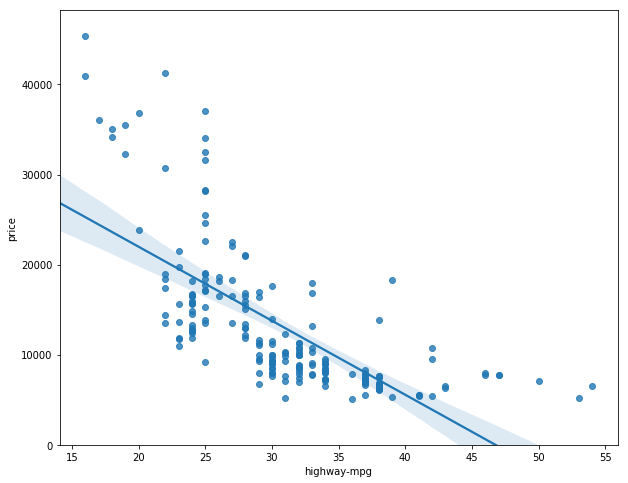

In [189]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47425.124162884524)

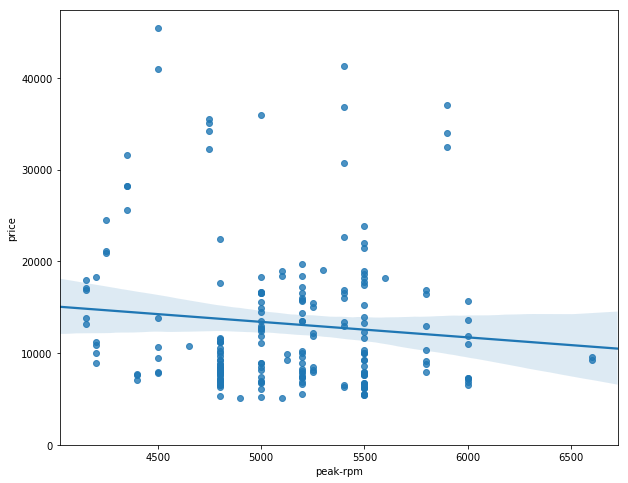

In [190]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

<h4>Residual Plot</h4>

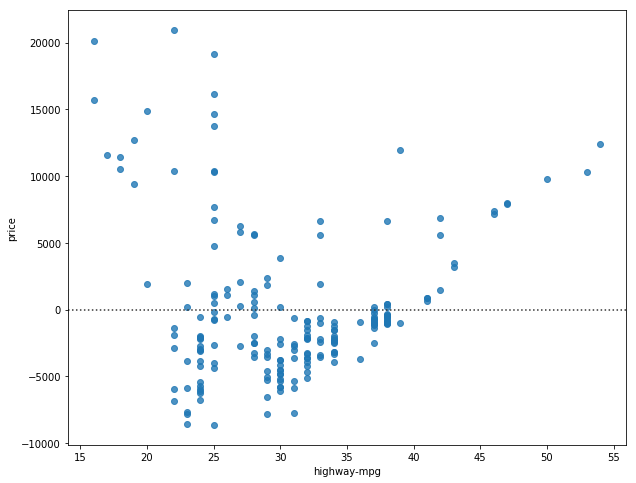

In [191]:
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

The residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

<h4>Distribution plot for Multiple Linear Regression</h4>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


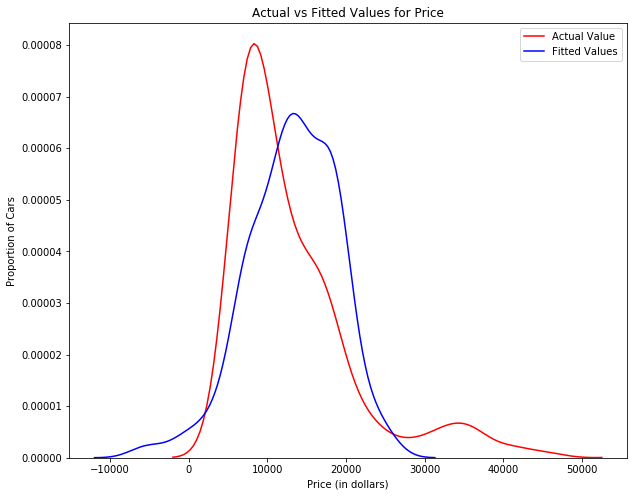

In [192]:
# Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

<h3>Polynomial Regression and Pipelines</h3>

We will use the following function to plot the data:

In [193]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

<h4> a) </h4> First, we will fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


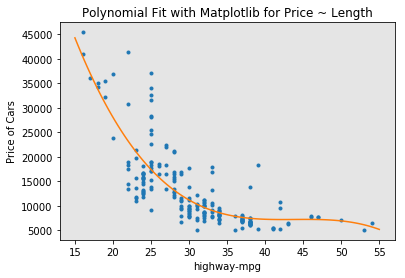

In [194]:
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')

This polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

<h4>b) </h4> Also, we can perform a polynomial transform on multiple features. 

In [195]:
from sklearn.preprocessing import PolynomialFeatures

In [196]:
# We create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)


In [197]:
print(Z.shape)
print(Z_pr.shape)

(201, 4)
(201, 15)


Now we will use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [199]:
# We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [200]:
pipe=Pipeline(Input)
#pipe

In [201]:
# Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
pipe.fit(Z,df['price'])
ypipe=pipe.predict(Z)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<h3>Measures for In-Sample Evaluation</h3>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<b>Model 1: Simple Linear Regression</b>

In [202]:
# X = df[['highway-mpg']]
# Y = df['price']
# lm = LinearRegression()

lm.fit(df[['highway-mpg']], df['price'])
# Find the R^2
print('The R-square is: ', lm.score(df[['highway-mpg']], df['price']))

The R-square is:  0.4965911884339176


In [203]:
from sklearn.metrics import mean_squared_error

In [204]:
Yhat=lm.predict(df[['highway-mpg']])
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<b>Model 2: Multiple Linear Regression</b>

In [205]:
# Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

Y_predict_multifit = lm.predict(Z)
mse = mean_squared_error(df['price'], Y_predict_multifit)

print('The mean square error of price and predicted value using multifit is: ', mse)

The R-square is:  0.8093732522175299
The mean square error of price and predicted value using multifit is:  11979300.349818882


<b>Model 3: Polynomial Fit</b>

In [206]:
from sklearn.metrics import r2_score

In [207]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

print('The mean square error is: ', mean_squared_error(df['price'], p(x)))

The R-square value is:  0.674194666390652
The mean square error is:  20474146.426361218


<h3>Prediction and Decision Making</h3>

<p>To compare the results of the models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.</p>

<b>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</b>

<ul>
    <li><b>MSE</b>: The MSE of SLR is 3.16 x10^7  while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>

This shows that MLR seems like the better model fit in this case, compared to SLR.

<b>Simple Linear Model (SLR) vs Polynomial Fit</b>
<ul>
    <li><b>MSE</b>: The MSE for the Polynomial Fit is 2.05 x10^7, this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit which is 0.674, is larger than the R-squared for the SLR.</li>
</ul>

<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<b>Multiple Linear Regression (MLR) vs Polynomial Fit</b>
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

<b> Conclusion</b>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>

## Model Evaluation and Refinement

In [208]:
# lets only use numeric data
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


In [209]:
%%capture
! pip install ipywidgets

In [210]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [211]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [212]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and Testing

In [213]:
y_data = df['price']
x_data=df.drop('price',axis=1)


In [214]:
from sklearn.model_selection import train_test_split

In [215]:
# randomly split our data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


In [216]:
# from sklearn.linear_model import LinearRegression

In [217]:
lre=LinearRegression()
# fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)
# R^2
print("R^2 for test data:  ",lre.score(x_test[['horsepower']], y_test))
print("R^2 for train data: ",lre.score(x_train[['horsepower']], y_train))

R^2 for test data:   0.7076967079117262
R^2 for train data:  0.6450110239384648


### Cross-validation Score

In [218]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [219]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
# each element in the array has the average R^2 value in the fold:
print("R^2 for each element in the fold: ",Rcross)
print("The mean of the folds are: ", Rcross.mean(), "and the standard deviation is: " , Rcross.std())
# We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 
print("Negative mean squared error: ",-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error'))

R^2 for each element in the fold:  [0.77465419 0.51718424 0.74814454 0.04825398]
The mean of the folds are:  0.5220592359225417 and the standard deviation is:  0.29130480666118397
Negative mean squared error:  [20251357.78354631 43743920.05390439 12525158.34507634 17564549.69976652]


In [220]:
from sklearn.model_selection import cross_val_predict

In [221]:
# Output prediction:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

<h3 id="ref2">Overfitting, Underfitting and Model Selection</h3>

In [222]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])



In [223]:
Plot of predicted values using the training data compared to the training data. 

SyntaxError: invalid syntax (<ipython-input-223-5860bdd96746>, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


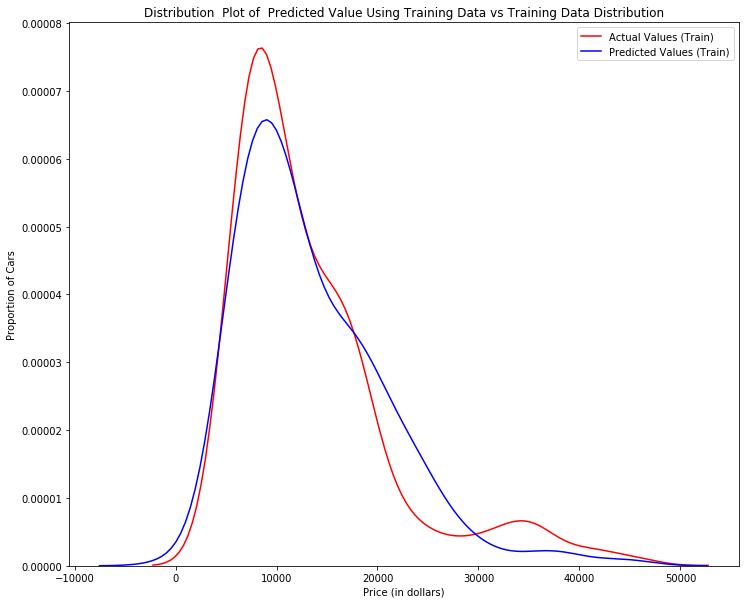

In [224]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Plot of predicted value using the test data compared to the test data:

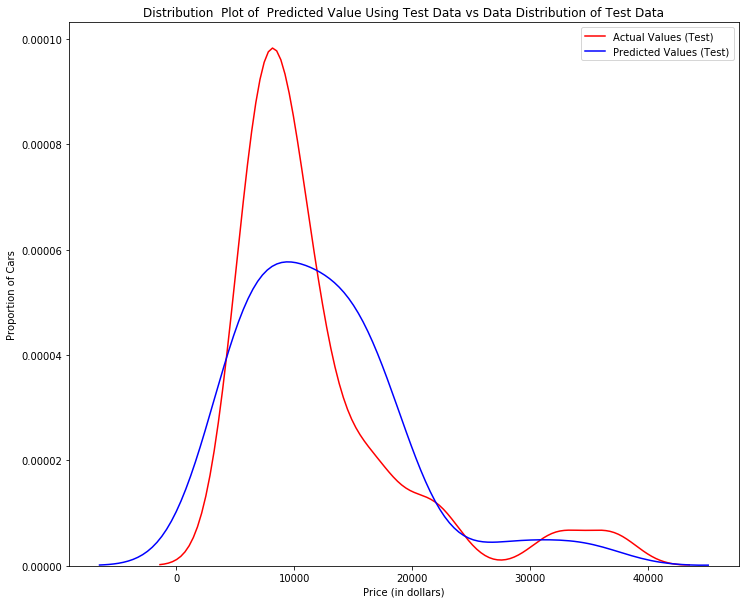

In [225]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

The distribution of the test data in the first figure is much better at fitting the data. This difference in the second figure is apparent where the ranges are from 5000 to 15000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [226]:
from sklearn.preprocessing import PolynomialFeatures

In [227]:
# use 45 percent of the data for testing 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
# We will perform a degree 5 polynomial transformation on the feature 'horse power'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
# create a linear regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)


A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

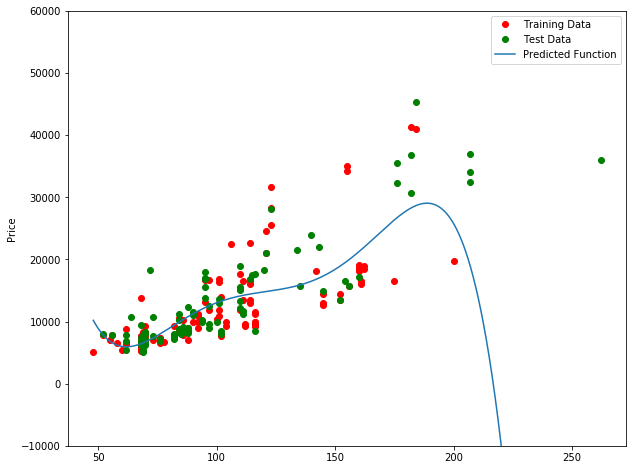

In [228]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

In [229]:
print("R^2 of the train data: ",poly.score(x_train_pr, y_train))
print("R^2 of the test data:  ",poly.score(x_test_pr, y_test))

R^2 of the train data:  0.5568527851379309
R^2 of the test data:   -29.815860653462618


The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting!

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

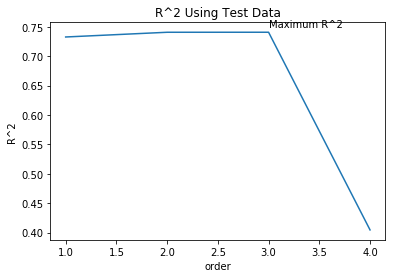

In [230]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

In [231]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [232]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Polynomial transforms with multiple features

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


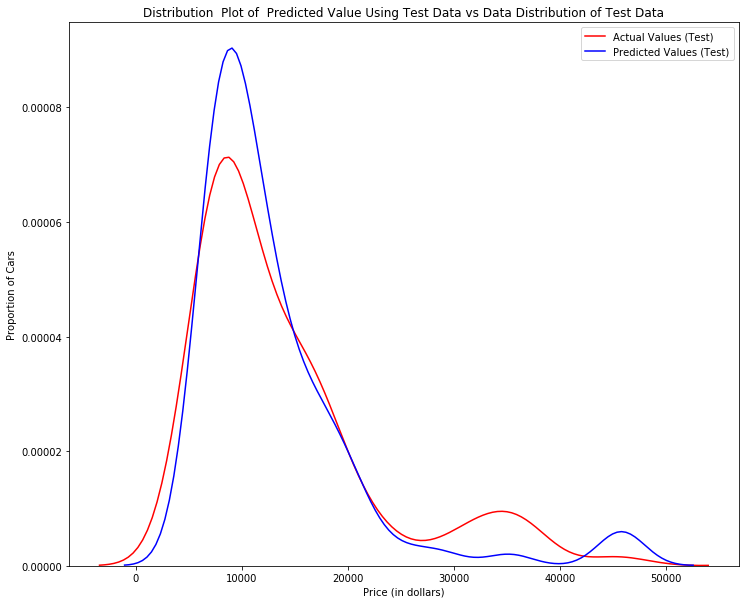

In [233]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)
yhat_test1 = poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test1,"Actual Values (Test)","Predicted Values (Test)",Title)    

<h3 id="ref3">Ridge regression</h3> 

In [234]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [235]:
from sklearn.linear_model import Ridge

In [236]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6569.10080596  9595.9695303  20834.19869602 19347.43557722]
test set : [ 6295. 10698. 13860. 13499.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.029715e-16
  overwrite_a=True).T


In [237]:
# We select the value of Alfa that minimizes the test error
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))


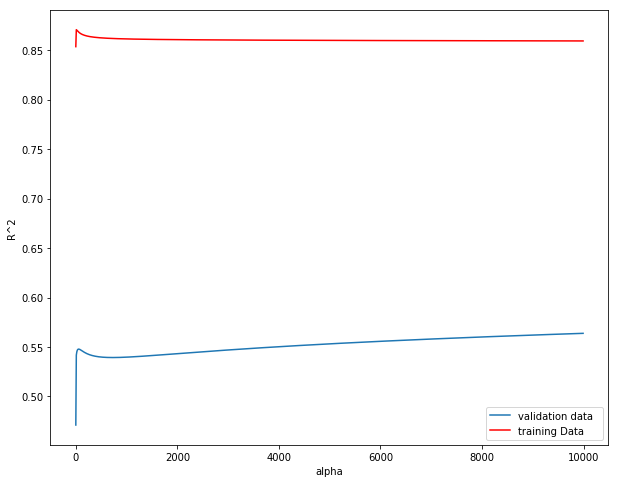

In [238]:
# Plot
width = 10
height = 8
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line in the figure represents the R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases. 

### Grid search

The term Alfa is a hyperparameter. To find the best hyperparameter, we will use the class <b>GridSearchCV</b> in sklearn.

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
# dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
print(Grid1)

# The object finds the best parameter values on the validation data. 
# We can obtain the estimator with the best parameters and assign it to the variable BestRR 
BestRR=Grid1.best_estimator_

# test our model on the test data
print(BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test))

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.841178138779323


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

In [241]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)